# Principal Component Analysis and Non-Negative Matrix Factorization

**Recitation by Dr. Duygu Ataman and Umang Sharma**

_12/01/2023, 09:30, 14:00 at Room 150_

_12/01/2023, 10:45, 15:15 Office Hours at Room 350 (For any follow-up questions)_

Please find the notebook on the link: https://drive.google.com/file/d/1IpUYocdQPl58PhCeJd9QeiynwgLzlJG7/view?usp=sharing

and make a copy of it in your own Google Drive to add your solutions to the exercises.

This notebook aims to introduce dimensionality reduction with Principle Component Analysis (PCA) and Non-negative Matrix Factorization (NMF).

As discussed in the lecture the two techniques differ in the constraints they impose on the dictionary elements and the representations, which in-turn leads to a completely different objective function and the optimization algorithm.

## Principal Component Analysis (PCA)

PCA is essentially a projection method, which involves computing the projections of the original input into a smaller dimension representation such that the error between the original vector and the reconstructed is minimized.


$$
\arg \min_{W,Z} \| X - WZ \|^2_F
$$


This method is mathematically equivalent to maximizing the variance of the projected data and can be efficiently computed by decomposing the data matrix $X$ into its singular values.

### Load the dataset

We will first load the standard packages and then load and use the black-white faces data set, which is available to download from here:
https://github.com/HyTruongSon/Pattern-Classification/tree/master/MIT-CBCL-database

We have the files already in the folder distributed in the link: https://drive.google.com/drive/folders/1iblgp01bGuyLoOqpddwEGYxLg3m36uUW?usp=share_link

Load the standard packages

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy import linalg
from scipy.sparse import diags
import scipy.optimize

import autograd
from autograd import grad
import autograd.numpy as numpy
import autograd.numpy.random as npr

%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/MyDrive/473-Fall23-Recitation/Fall2023-473-Lab12')

# the normalize function which first computes the mean
# and then subtracts it from all the data points
def normalize(data):
    mean = np.mean(data, axis=1)[:,None]
    return data - mean

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Load the dataset and display a test image

Input data shape: (2429, 361)


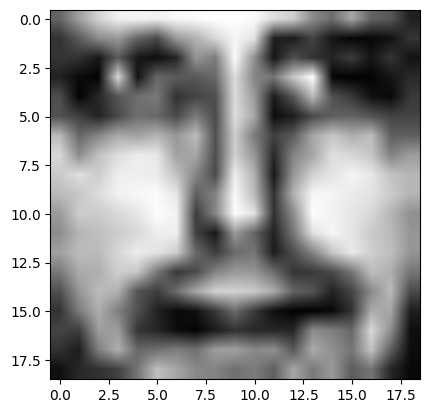

In [38]:
raw_data = open('/content/gdrive/MyDrive/FML/Fall2023-473-Lab12/data/svm.train.normgrey').readlines()
X = []

for line in raw_data[2:]:
    if line.strip() == "":
        continue
    if int(line.split()[-1]) == -1:
        # not face, skip
        continue
    else:
        X.append( [float(yy) for yy in line.split()[:-1]] )

X = np.array(X)
print('Input data shape: {}'.format(X.shape))

plt.imshow(X[0].reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")

X = normalize(X)
X = np.transpose(X)

Get the size of the original input space and also set the size of the new low-dimensional output space

In [39]:
n_comp = 121  # how many dimensions will be in the new space

(d, N) = X.shape
q = n_comp

print ("d: old dim",  d)
print ("N: num of samples", N)
print ("q: new dim", q)

d: old dim 361
N: num of samples 2429
q: new dim 121


### Compute the Principal Components

We use the Singular Value Decomposition of the matrix X to compute all the components

In [40]:
def train_pca_svd(input_data):
    U, S, V = linalg.svd(X)  # SVD decomposition
    print('Input dimensions: {}'.format(input_data.shape))
    print('Left singular vector matrix shape: {}'.format(U.shape))
    print('Right singular vector matrix shape: {}'.format(V.shape))
    print('Singular value matrix shape: {}'.format(S.shape))

    return S, U

In [41]:
S_faces, U_faces = train_pca_svd(X)

Input dimensions: (361, 2429)
Left singular vector matrix shape: (361, 361)
Right singular vector matrix shape: (2429, 2429)
Singular value matrix shape: (361,)


In order to compute the principal components, we take the most impactful columns of the left singular matrix

In [42]:
# take q most impactful columns from U. These are your principal components
top_vectors = U_faces[:, :q]

# reduce dimensionality of our input data by projecting each point onto the principal components
X_reduced = X.transpose() @ top_vectors

In [43]:
# lets check the shape of the old and the new data matrix
np.transpose(X).shape, X_reduced.shape

((2429, 361), (2429, 121))

### Visualization of principle components

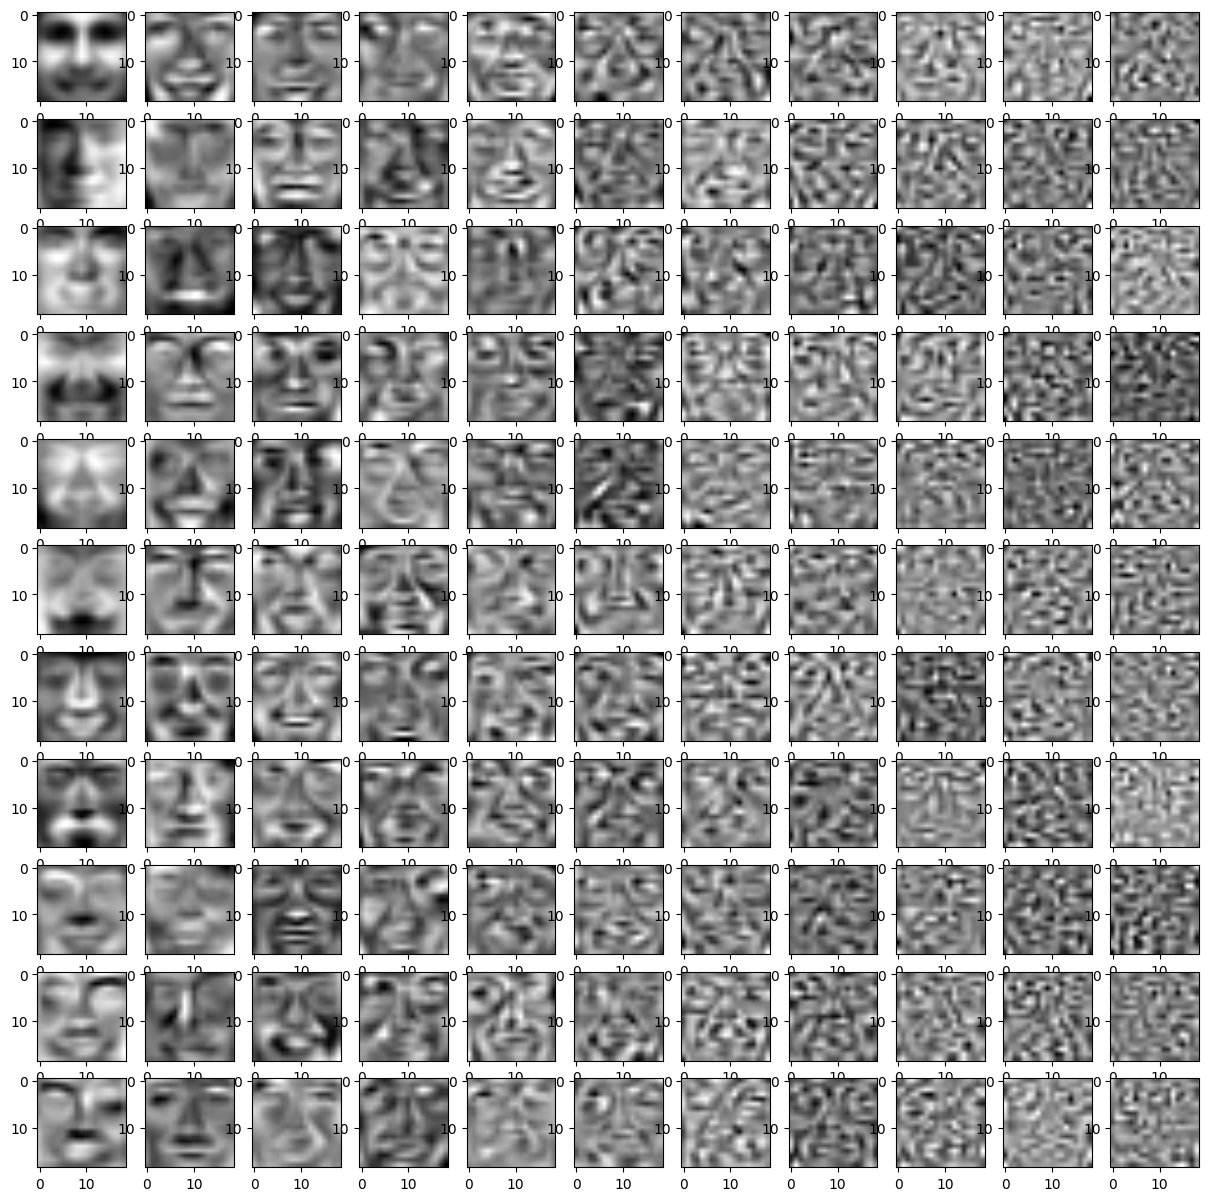

In [44]:
loadings = top_vectors.transpose()
f, axarr = plt.subplots(int(np.sqrt(n_comp)), int(np.sqrt(n_comp)), figsize = (15, 15))

comp_ix = 0
# loop over the principal components and display them as an image of size 19x19
for j in range(int(np.sqrt(n_comp))):
    for i in range(int(np.sqrt(n_comp))):
        axarr[i, j].imshow(loadings[comp_ix].reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")
        comp_ix += 1

In [45]:
# compute the reconstruction error between the original and reconstructed image
reconstruction_err = np.linalg.norm( X - top_vectors @ np.transpose(X_reduced) )
print ('Reconstructions error: ', reconstruction_err)

Reconstructions error:  38.38769195134055


# Reconstruct the image back from the reduced space

In [46]:
def reconstruct_face(idx):
    original_face = X[:,idx]
    reduced_face = X_reduced[idx]
    reconstructed_face = reduced_face @ loadings

    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(original_face.reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")

    plt.subplot(1, 3, 3)
    plt.imshow(reconstructed_face.reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")

In [47]:
loadings.shape

(121, 361)

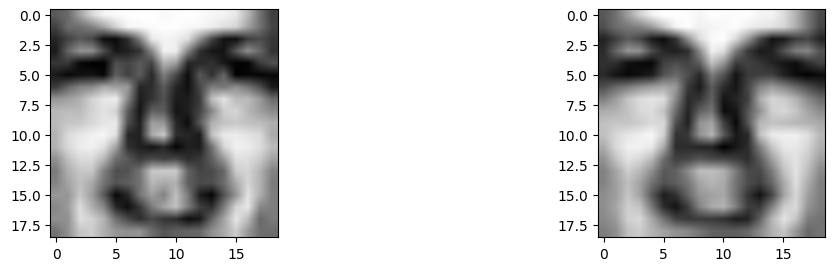

In [48]:
# the reconstructed face does not look that bad
reconstruct_face(20)

## Exercise 1

Repeat the dimensionality reduction with PCA with target dimension size of 200, 100 and 50. Plot the reconstructed images and compute the reconstruction error. Reconstruct the image using the reduced dimensions. Comment on how the results are affected as the dimension changes.

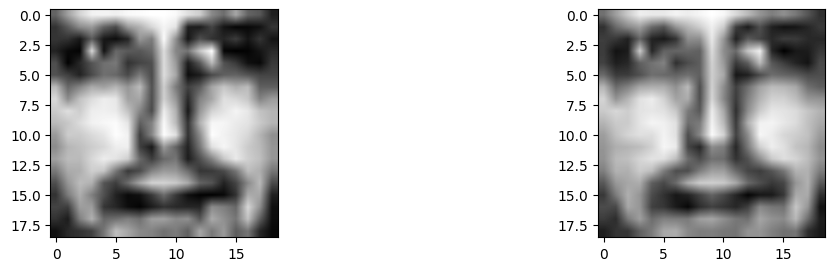

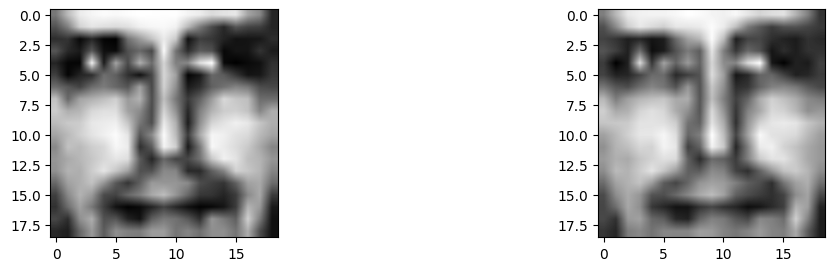

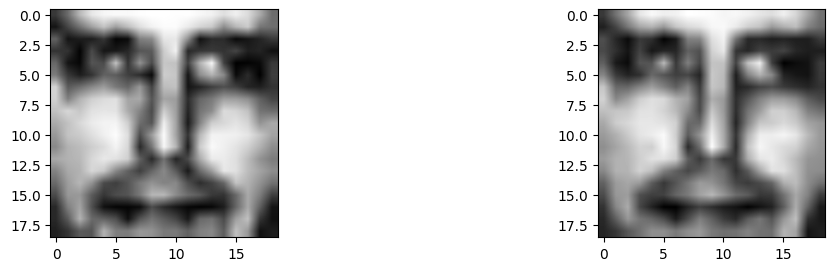

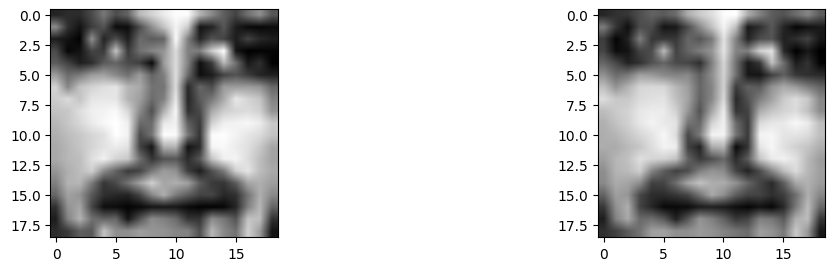

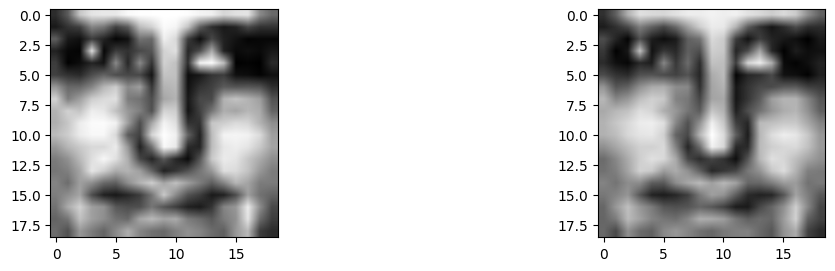

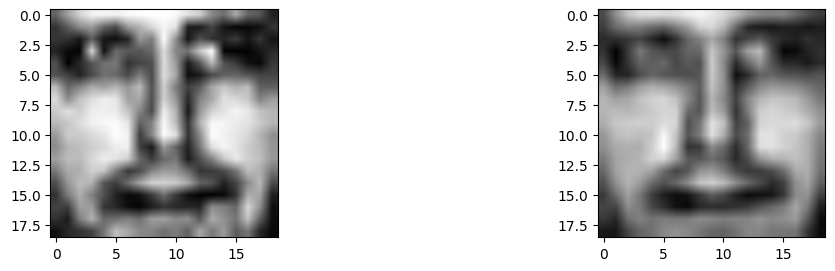

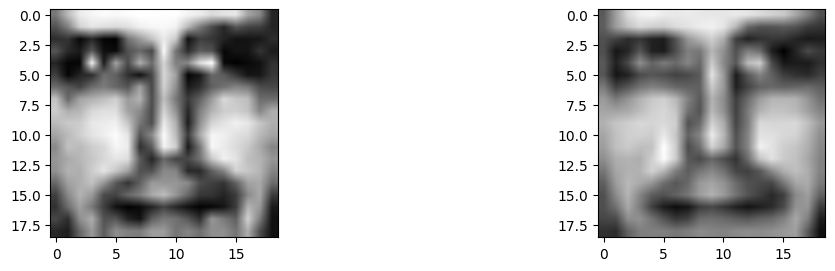

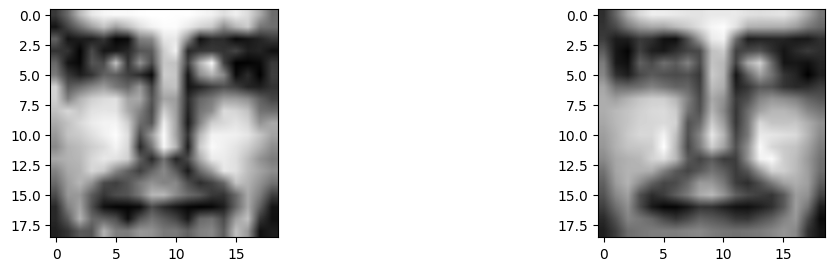

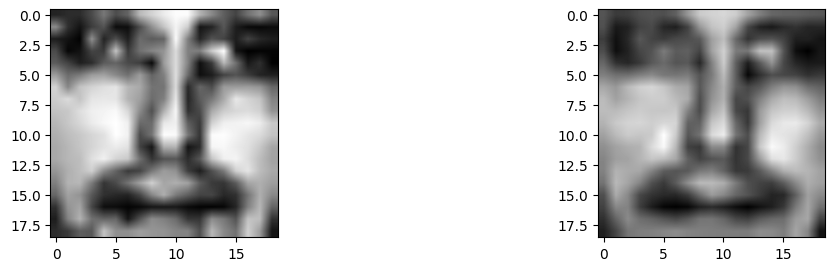

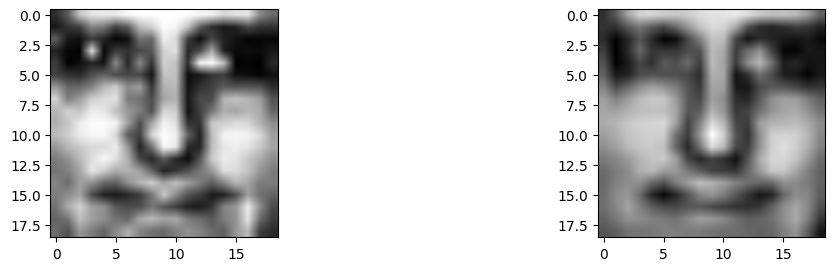

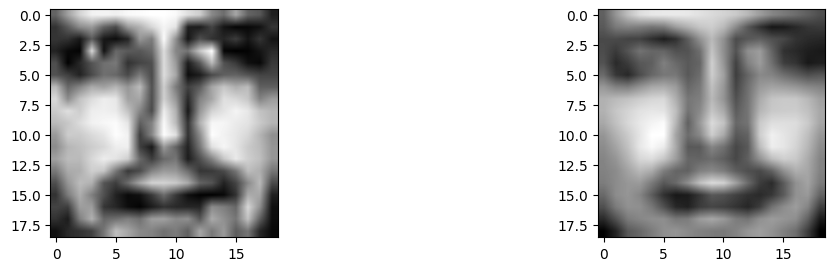

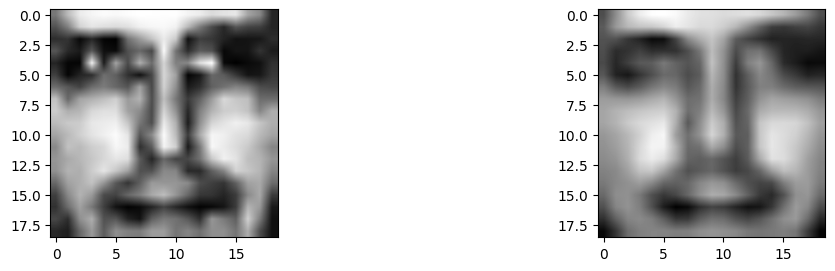

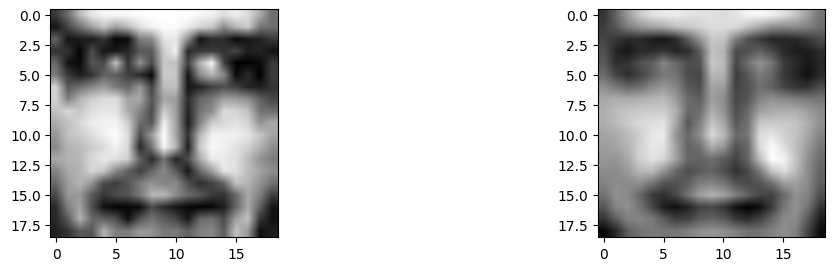

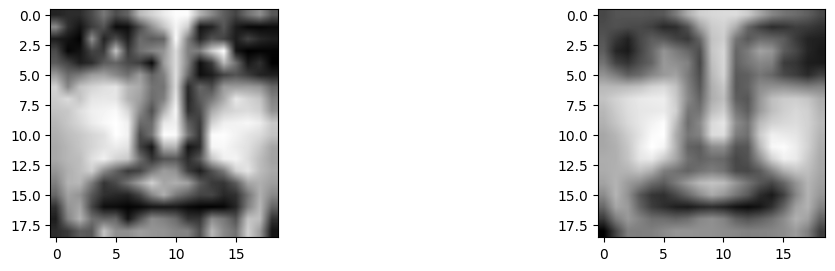

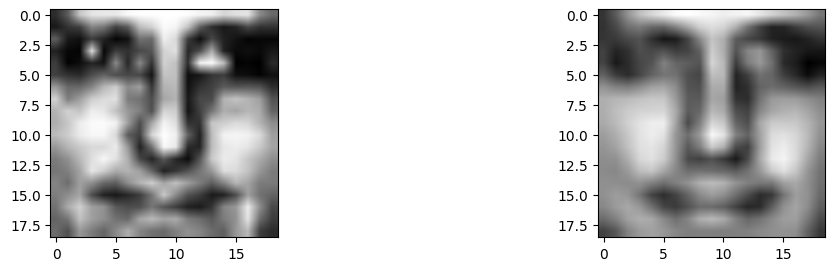

In [49]:
## TO-DO
for q_test in 200,100,50:
  top_vectors = U_faces[:, :q_test]
  loadings = top_vectors.transpose()

  for idx in range(5):
    X_recon = X.transpose() @ top_vectors @ loadings
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(X[:,idx].reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")

    plt.subplot(1, 3, 3)
    plt.imshow(X_recon[idx].reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")

## Non-Negative Matrix Factorization (NMF)
The optimization problem for non-negative matrix factorization is similar to the PCA, except it has additional non-negativity constraints on $W$ and $Z$.

$$
\begin{align}
\arg \min_{W,Z} & \| X - WZ \|^2_F \\
s.t. \quad & w_{ij} \ge 0 \quad i = 1, \ldots, n \quad j = 1, \ldots, p \\
           & z_{ij} \ge 0 \quad i = 1, \ldots, p \quad j = 1, \ldots, n \\
\end{align}
$$

Presence of additional constraints makes the optimization problem a little harder.

In [50]:
def train_nmf(input_data):
    multiplicative = True
    maxiter = 1000
    X = input_data
    W = np.real( (np.random.rand(d,q))*0.5 )
    Z = np.real( (np.random.rand(q,N))*0.5 )
    print ('start optimising...')
    # X : (d, N)
    # W : (d, q)
    # Z : (q, N)
    for u_iter in range(maxiter):
        if multiplicative:
            diff = X - W @ Z
            W = W * (X @ np.transpose(Z)) / (W @ Z @ np.transpose(Z))
            Z = Z * (np.transpose(W) @ X) / (np.transpose(W) @ W @ Z)
        else:
            diff = X - W @ Z
            lr = 0.001
            W_ = W + lr * (diff) @ np.transpose(Z)
            Z_ = Z + lr * np.transpose(W) @ (diff)
            W, Z = np.maximum(W_, 0, W_), np.maximum(Z_, 0, Z_)

        if u_iter % 100 == 0:
            print (autograd.numpy.linalg.norm(diff))

    print ('optimization finished')
    return W, Z

In [51]:
X = X - np.min(X)  # why do we do that?

loadings, X_reduced = train_nmf(X)

start optimising...
6589.514170787325
88.12002708032635
71.7381439022656
66.0771505694532
63.08029822777916
61.18287094361774
59.842933031019015
58.83283731289751
58.03041709536697
57.37170213062797
optimization finished


In [52]:
loadings = loadings.transpose()

In [53]:
print(n_comp)

121


0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2
10 2
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3
10 3
0 4
1 4
2 4
3 4
4 4
5 4
6 4
7 4
8 4
9 4
10 4
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
8 5
9 5
10 5
0 6
1 6
2 6
3 6
4 6
5 6
6 6
7 6
8 6
9 6
10 6
0 7
1 7
2 7
3 7
4 7
5 7
6 7
7 7
8 7
9 7
10 7
0 8
1 8
2 8
3 8
4 8
5 8
6 8
7 8
8 8
9 8
10 8
0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9
10 9
0 10
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
10 10


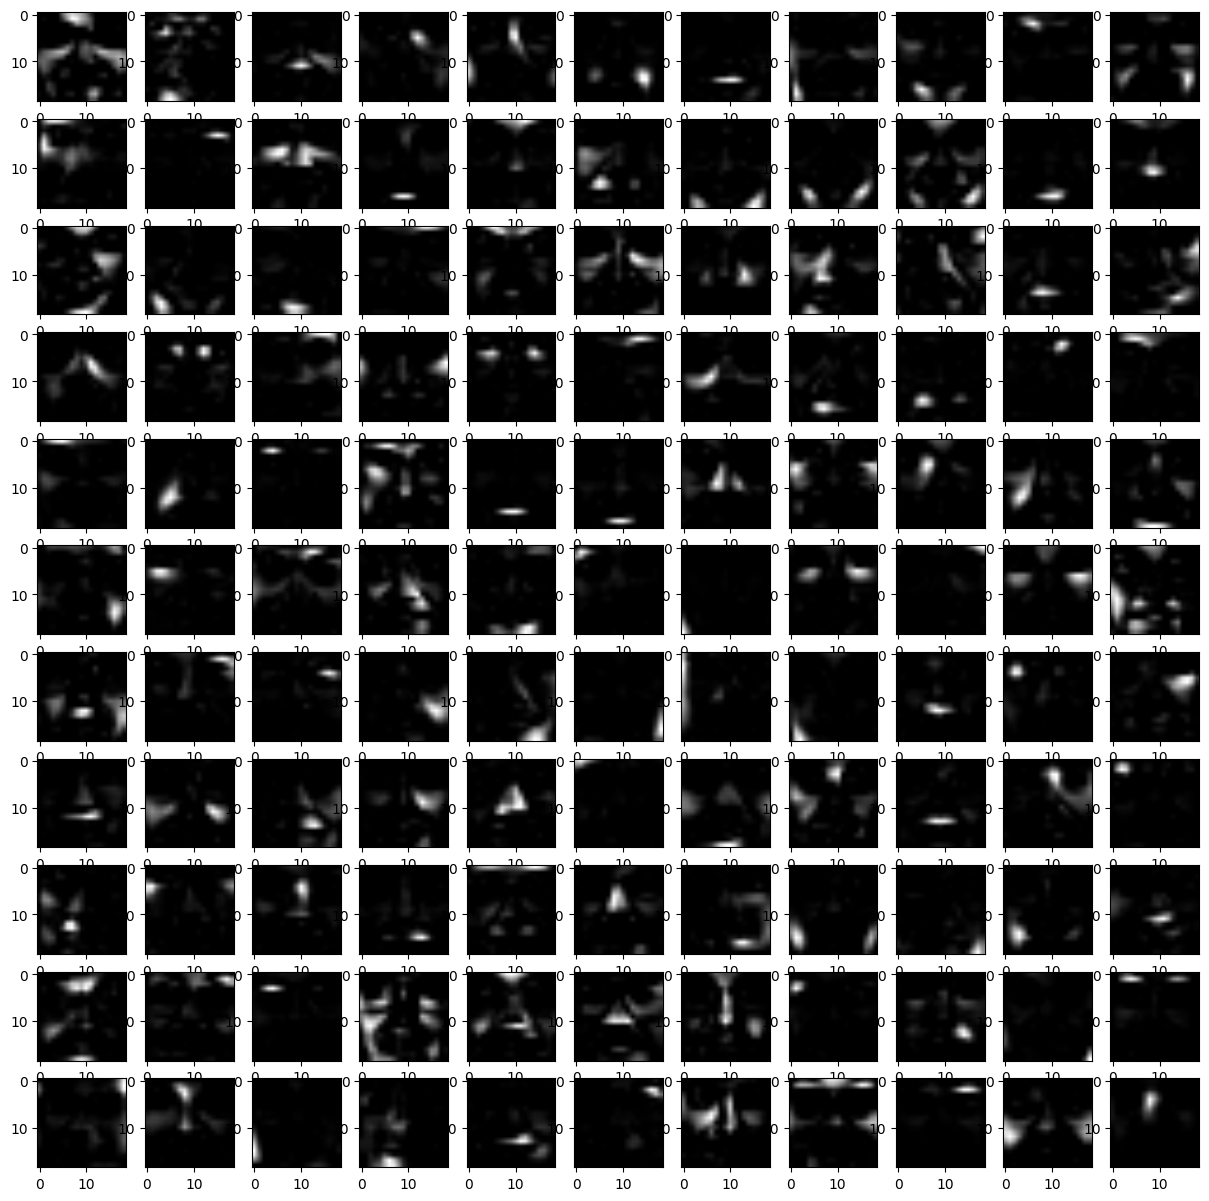

In [54]:
# visualize the factorization learnt
f, axarr = plt.subplots(int(np.sqrt(n_comp)), int(np.sqrt(n_comp)), figsize = (15, 15))

comp_ix = 0
for j in range(int(np.sqrt(n_comp))):
    for i in range(int(np.sqrt(n_comp))):
        print(i,j)
        axarr[i, j].imshow(loadings[comp_ix].reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")
        comp_ix += 1

## Featurizing text data and reducing its dimensionality

We will now see a second example of dimensionality reduction on text data. In this data set, each document will be a training sample and it will be represented as a tf-idf vector. Tf-idf which is an abbreviation of **Term Frequency Inverse Document Frequency** and its definition is provided here: https://en.wikipedia.org/wiki/Tf%E2%80%93idf  

In [55]:
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

newsgroups_train= datasets.fetch_20newsgroups(subset='train',
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])
tfidf_vectorizer = TfidfVectorizer(min_df=30)
X = tfidf_vectorizer.fit_transform(newsgroups_train.data).toarray()
y = newsgroups_train.target

In [56]:
print(X[0][0:100])
print(y)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.06961504 0.         0.
 0.         0.         0.         0.         0.07296304 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.0963884  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[2 2 0 ...

In [57]:
X = np.transpose(X)

(d, N) = X.shape
q = 5  # our reduced dimension

print ("d: old dim",  d)
print ("N: num of samples", N)
print ("q: new dim", q)

d: old dim 1771
N: num of samples 2369
q: new dim 5


In [58]:
S_text, V_text = train_pca_svd(X)

Input dimensions: (1771, 2369)
Left singular vector matrix shape: (1771, 1771)
Right singular vector matrix shape: (2369, 2369)
Singular value matrix shape: (1771,)


In [59]:
# take q most impactful columns from V
top_vectors = V_text[:, :q]

# reduce dimensionality of our input data
X_reduced = X.transpose() @ top_vectors

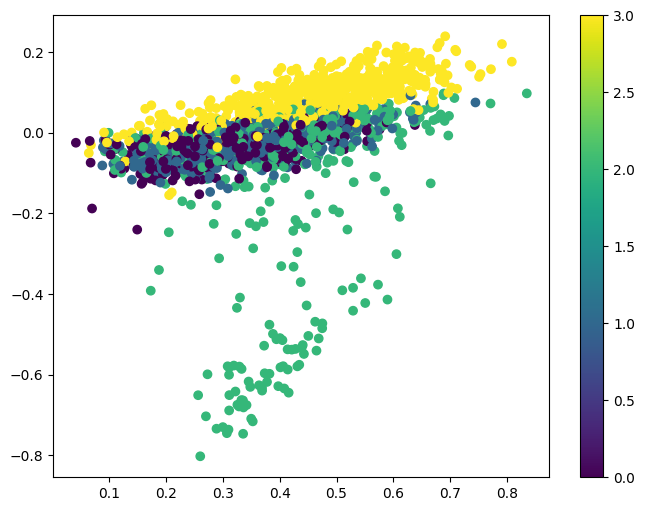

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:,0], X_reduced[:, 1], c = y)
plt.colorbar()

In [61]:
loadings = top_vectors.transpose()
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])
insens_idx = np.argsort(loadings[0])

print ('Top 10 most activated words (loadings)')
for jj in insens_idx[-10:]:
    print ('{} ({:0.6f})'.format(invocab[jj], loadings[0,jj]))


print ('\n Top 10 least activated words (loadings)')
for jj in insens_idx[:10]:
    print ('{} ({:0.6f})'.format(invocab[jj], loadings[0,jj]))

Top 10 most activated words (loadings)
for (0.114492)
you (0.132383)
it (0.160184)
that (0.178339)
in (0.184909)
is (0.189900)
and (0.206761)
of (0.255349)
to (0.266096)
the (0.472707)

 Top 10 least activated words (loadings)
58 (0.002314)
reduce (0.002355)
mon (0.002376)
despite (0.002425)
toward (0.002450)
51 (0.002455)
developed (0.002462)
argue (0.002472)
typical (0.002473)
1st (0.002503)


In [62]:
reconstruction_err = np.linalg.norm( X - top_vectors @ np.transpose(X_reduced) )
print ('Reconstructions error: ', reconstruction_err)

Reconstructions error:  43.35201754483636


## Exercise 2

Let's try to analyze what kind of features are being learnt as a result of the dimensionality reduction objective. Repeat the extraction of top 10 words for all 5 dimensions in the reduced vectors. Comment on the results.

In [65]:
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])

# TO-DO: for each PCA dimension, sort the top 10 words corresponding to that dimension

for k in range(5):
  insens_idx = np.argsort(loadings[k])

  print("most activated words for the "+str(k)+"th dimension:")
  for jj in insens_idx[-10:]:
      print ('{} ({:0.6f})'.format(invocab[jj], loadings[0,jj]))


  print("least activated words for the "+str(k)+"th dimension:")
  for jj in insens_idx[:10]:
    print ('{} ({:0.6f})'.format(invocab[jj], loadings[0,jj]))



most activated words for the 0th dimension:
for (0.114492)
you (0.132383)
it (0.160184)
that (0.178339)
in (0.184909)
is (0.189900)
and (0.206761)
of (0.255349)
to (0.266096)
the (0.472707)
least activated words for the 0th dimension:
58 (0.002314)
reduce (0.002355)
mon (0.002376)
despite (0.002425)
toward (0.002450)
51 (0.002455)
developed (0.002462)
argue (0.002472)
typical (0.002473)
1st (0.002503)
most activated words for the 1th dimension:
bible (0.021802)
church (0.024614)
christians (0.023335)
his (0.044247)
jesus (0.029665)
we (0.074008)
that (0.178339)
he (0.066717)
the (0.472707)
god (0.061586)
least activated words for the 1th dimension:
pitt (0.028771)
geb (0.022629)
banks (0.023109)
gordon (0.023448)
edu (0.113562)
cs (0.036365)
shameful (0.007360)
dsl (0.007360)
cadre (0.007360)
n3jxp (0.007390)
most activated words for the 2th dimension:
ca (0.038451)
on (0.095631)
my (0.084304)
apple (0.027652)
mac (0.027487)
bike (0.034374)
posting (0.037327)
host (0.034934)
nntp (0.03

The 0th dimension is probably just the most common words in general

The 1st dimension probably has to do with christianity

the 2nd dimension probably has to do with silicon valley

the 3rd dimension probably has to do with complex entities in some way

the 4th dimension I have no idea